In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("eda_data.csv")

In [3]:
# get relevant columns
# generate dummy variables
# train test split
# Multiple Linear Regression
# Lasso Regeression
# RandomForests
# train models for GridSearchCV
# Ensemble

In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp', 'azure', 'SQL', 'tableau_yn'],
      dtype='object')

In [5]:
# get relevant columns
df_model = df[['avg_salary','Rating','Size','Type of ownership', 'Industry', 'Sector', 'Revenue','hourly', 'employer_provided','job_state', 
               'same_state', 'age', 'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp', 'azure', 'SQL', 
               'tableau_yn','python_yn']]

In [6]:
df_model.shape

(742, 23)

In [7]:
# generate dummy variables
df_dum = pd.get_dummies(df_model)

In [8]:
df_dum.shape

(742, 182)

In [12]:
# train test split
from sklearn.model_selection import train_test_split

X=df_dum.drop(columns='avg_salary', axis=1)
y=df_dum["avg_salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_test.shape

(149, 181)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scalar.fit(X_train)

# Do it later

In [18]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)


In [19]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     7.985
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           7.02e-76
Time:                        17:03:27   Log-Likelihood:                -3340.0
No. Observations:                 742   AIC:                             6974.
Df Residuals:                     595   BIC:                             7652.
Df Model:                         146                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                40.1037      6.850      5.854      0.000      26.650      53.558
Rating                                                4.4274      2.007      2.206      0.028       0.486       8.369
hourly                                              -15.4246      9.902     -1.558      0.120     -34.873       4.023
employer_provided                                    29.4233     12.111      2.429      0.015       5.637      53.210
same_state                                            3.8104      2.772      1.375      0.170      -1.634       9.255
age                                                   0.0235      0.032      0.744      0.457      -0.039       0.086
spark                                                -1.9053      3.035     -0.628      0.530      -7.866       4.055
aws                                                   2.8788      2.972      0.969      0.333      -2.957       8.715
excel                                                -1.0249      2.381     -0.430      0.667      -5.702       3.652
desc_len                                             -0.0002      0.001     -0.278      0.781      -0.002       0.001
num_comp                                              2.4725      0.909      2.720      0.007       0.688       4.257
azure                                               -10.3351      4.834     -2.138      0.033     -19.829      -0.841
SQL                                                  -3.8663      2.765     -1.398      0.162      -9.296       1.563
tableau_yn                                           -3.6818      3.211     -1.147      0.252      -9.988       2.624
python_yn                                             8.9286      2.767      3.227      0.001       3.495      14.362
Size_-1                                              13.3254      9.039      1.474      0.141      -4.427      31.078
Size_1 to 50 employees                               -0.0837      6.822     -0.012      0.990     -13.481      13.314
Size_10000+ employees                                -2.5236      6.083     -0.415      0.678     -14.470       9.423
Size_1001 to 5000 employees                           6.6335      4.057      1.635      0.103      -1.334      14.601
Size_201 to 500 employees                             2.8552      4.091      0.698      0.485      -5.179      10.889
Size_5001 to 10000 employees                         -4.9921      5.733     -0.871      0.384     -16.252       6.267
Size_501 to 1000 employees                            3.4633      4.261      0.813      0.417      -4.905      11.831
Size_51 to 200 employees                              5.1990      4.628      1.123      0.262      -3.890      14.288
Size_Unknown   

In [38]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [22]:
# Multiple Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
np.mean(cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=5))

-20.000067814129

In [68]:
# Lasso Regeression
lm_l = Lasso(alpha=0.02)
lm_l.fit(X_train, y_train)

Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
np.mean(cross_val_score(lm_l, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=5))

-19.566110454618244

In [48]:
alpha = []
error = []
for i in range(1, 100):
    lml = Lasso(i/100)
    alpha.append(i/100)
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=5)))

In [49]:
max(error)

-19.566110454618244

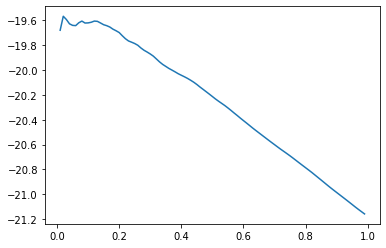

In [58]:
plt.plot(alpha, error)

In [57]:
alpha[error.index(max(error))]

0.02

In [59]:
# RandomForests
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

In [60]:
np.mean(cross_val_score(forest_reg, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=5))

-14.076471229169632

In [64]:
# train models for GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':range(10, 101, 10), 'criterion':['mae', 'mse'], 
          'max_features': ['auto', 'sqrt', 'log2']}

gs = GridSearchCV(forest_reg, params, scoring = 'neg_mean_absolute_error', cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [65]:
gs.best_score_

-13.686987893462469

In [66]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [70]:
# Ensemble test
sal_pred_lm = lm.predict(X_test)
sal_pred_lml = lm_l.predict(X_test)
sal_pred_rf = gs.best_estimator_.predict(X_test)

In [72]:
from sklearn.metrics import mean_absolute_error

print("Linear Regression:", mean_absolute_error(y_test, sal_pred_lm))
print("Lasso Regression:", mean_absolute_error(y_test, sal_pred_lml))
print("Random Forest:", mean_absolute_error(y_test, sal_pred_rf))

Linear Regression: 20.723420894635094
Lasso Regression: 20.63203309081816
Random Forest: 12.814228187919465


In [74]:
print("Random Forest + Lasso:", mean_absolute_error(y_test, (sal_pred_rf+sal_pred_lml)/2))

Random Forest: 15.693749050154171
